## Simulation of particules in a Box drawn from a particular distribution and their correlation

In [98]:
from lib import pair_correlation, make_bins, trace_pair_correlation, make_big_box

In [99]:
import numpy as np 
import math 
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpl_toolkits import mplot3d
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from scipy.spatial import KDTree

In [100]:
n = 100000

### Uniform distribution


#### Sample

In [101]:
data_unif = np.random.uniform(0,1,(n,3))

Create boxes around for periodic distance calculus 

### Gaussian distribution truncated to [0,1]



#### Sample 

In [102]:
lower, upper = 0, 1
mu, sigma = 0.5, 0.2

x_norm = stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=n)
y_norm = stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=n)
z_norm = stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=n)

In [103]:
data_norm = np.stack((x_norm, y_norm, z_norm), axis=-1)

### Log-normal distribution truncated to [0,1]

#### Sample 

In [104]:
# create log-normal from normal by the formula exp(N(0,1)) = log-normal(0,1)
#we want a log normal with values between 0 and 1 
sig = 0.35
s = 0.38

x_log = stats.lognorm.rvs(s, loc=0, scale=sig, size=n)
y_log = stats.lognorm.rvs(s, loc=0, scale=sig, size=n)
z_log = stats.lognorm.rvs(s, loc=0, scale=sig, size=n)
# we need to truncate it to values between 0 and 1 +chose parameter 

In [105]:
data_log = np.stack((x_log, y_log, z_log), axis=-1)
data_log = np.delete( data_log, np.where(data_log > 1) , axis = 0 )

### Correlation function

In [106]:
r_max = 0.5 
dr = 0.01

try to fit to those types of functions after : 


In [107]:
def f_norm(x, mu, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma)*np.exp(-((x-mu)**2)/(2*sigma**2)))

In [108]:
def polynome_s(x, a, b, c):
    return (a*(x**b)+c)

In [109]:
def polynome(x, a, b, c, d, e):
    return (a*(x**d)+b*(x**e)+c)

In [110]:
def polynome_inv(x, a, b, c):
    return (a*(1/x)+b*(1/(x**2))+c)

In [111]:
def one_puissance(x,a):
    return(x**a)

### Uniform

In [112]:
len(data_unif)

100000

In [113]:
#abscisse, correlation = pair_correlation(data_unif, r_max, dr)

In [114]:
#np.savetxt("Unif_corr_100_000_rmax=0.5_dr=0.01.txt", [abscisse, correlation])

In [115]:
abscisse, correlation = np.loadtxt("Unif_corr_100_000_rmax=0.5_dr=0.01.txt")

In [116]:
a,b,c= sp.optimize.curve_fit(polynome_inv, abscisse[1:], correlation[1:], maxfev = 1200000 )[0]

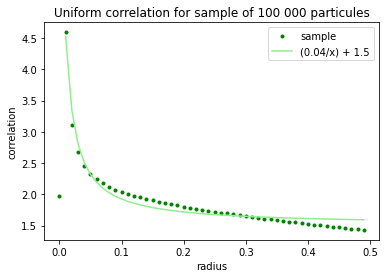

In [117]:
plt.plot(abscisse, correlation, '.', color = 'green', label='sample')
plt.plot(abscisse[1:],polynome_inv(abscisse[1:], a,b,c) , color = 'lightgreen', label = '(0.04/x) + 1.5')
# Add title and axis names
plt.title('Uniform correlation for sample of 100 000 particules')
plt.xlabel('radius')
plt.ylabel('correlation')
plt.legend()

plt.savefig("Unif-corr-mpl.pdf")

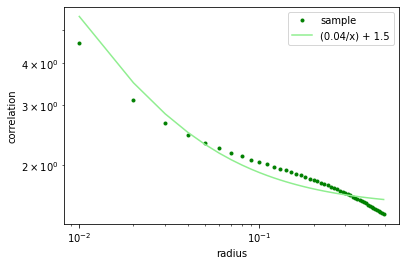

In [118]:
plt.loglog(abscisse, correlation, '.', color = 'green', label = 'sample')
plt.loglog(abscisse[1:],polynome_inv(abscisse[1:],0.04,0,1.5) , color = 'lightgreen', label = '(0.04/x) + 1.5')
# Add title and axis names
plt.xlabel('radius')
plt.ylabel('correlation')
plt.legend()

plt.savefig("Unif-corr-log-mpl.pdf")

In [119]:
#fig = trace_pair_correlation(abscisse[1:], correlation[1:], 'uniform','ghostwhite', 'green', n)

x_min = 0
x_max = 0.5

mean = 0.5
std = 0.15

x = np.linspace(0, 0.5, 100)

fig.add_trace(go.Scatter(x = np.linspace(0, 0.5, 100)[1:], y =polynome_inv(x[1:],a, b,c),marker_color = "lightgreen", name="Polynome 1/x + 1.5 "))

### Normal

In [120]:
#abscisse_norm, correlation_norm = pair_correlation(data_norm, 0.5, 0.01)

In [121]:
#np.savetxt("Norm_corr_100_000_rmax=0.5_dr=0.01.txt", [abscisse_norm, correlation_norm])

In [122]:
abscisse_norm, correlation_norm = np.loadtxt("Norm_corr_100_000_rmax=0.5_dr=0.01.txt")

fig_norm1 = trace_pair_correlation(abscisse_norm, correlation_norm, 'normal','ghostwhite', 'blue', n)
fig_norm1.show()

In [123]:
a,b,c  = sp.optimize.curve_fit(polynome_inv, abscisse_norm[1:], correlation_norm[1:], maxfev = 1200000 )[0]

x = np.linspace(0, 0.5, 40)
fig_norm1.add_trace(go.Scatter(x = x, y = polynome_inv(x, a,b,c) , marker_color = 'pink'))

#### Other method (see overleaf)

In [124]:
#corr_norm = make_bins(data_norm, r_max, dr) / make_bins(data_unif, r_max, dr)

In [125]:
#corr_norm = corr_norm - 1 
#abs_corr_norm = np.arange(0, r_max, dr)

In [126]:
#np.savetxt("Norm_corr_autre_methode_100_000_rmax=0.5_dr=0.01.txt", [abs_corr_norm, corr_norm])

In [127]:
abs_corr_norm, corr_norm = np.loadtxt("Norm_corr_autre_methode_100_000_rmax=0.5_dr=0.01.txt")

In [128]:
mu, sig = sp.optimize.curve_fit(f_norm, abs_corr_norm, corr_norm)[0]

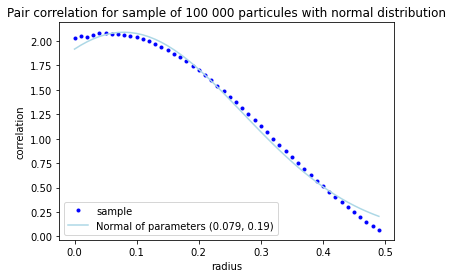

In [129]:
plt.plot(abs_corr_norm, corr_norm, '.', color = 'blue', label='sample')
plt.plot(abscisse, f_norm(abscisse,mu,sig), color = 'lightBlue', label = 'Normal of parameters (0.079, 0.19)')
# Add title and axis names
plt.title('Pair correlation for sample of 100 000 particules with normal distribution')
plt.xlabel('radius')
plt.ylabel('correlation')
plt.legend()

plt.savefig("Norm-corr-mpl.pdf")

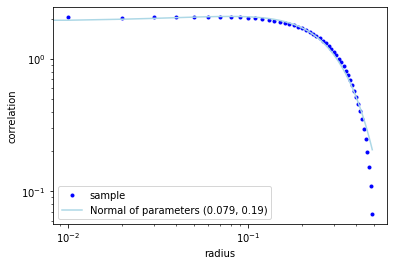

In [130]:
plt.loglog(abs_corr_norm, corr_norm, '.', color = 'blue', label='sample')
plt.loglog(abscisse, f_norm(abscisse,mu,sig), color = 'lightBlue', label = 'Normal of parameters (0.079, 0.19)')
# Add title and axis names
plt.xlabel('radius')
plt.ylabel('correlation')
plt.legend()
plt.savefig("Norm-corr-log-mpl.pdf")

In [131]:
#fig_norm_2 = trace_pair_correlation(abs_corr_norm, corr_norm, 'normal', 'ghostwhite', 'blue', n)

x = np.linspace(0, 0.5, 30)
fig_norm_2.add_trace(go.Scatter(x = x, y = f_norm(x,mu,sig),marker_color = 'deepskyblue', name="Normal density N(0.08,0.19) "))

### Log-normal

In [132]:
#absi_log , corr_log = pair_correlation(data_log, 0.5, 0.01)

In [133]:
#np.savetxt("Log_corr_100_000_rmax=0.5_dr=0.01.txt", [absi_log , corr_log])

In [134]:
absi_log , corr_log = np.loadtxt("Log_corr_100_000_rmax=0.5_dr=0.01.txt")

In [135]:
a,b = sp.optimize.curve_fit(f_norm, absi_log[1:], corr_log[1:])[0]

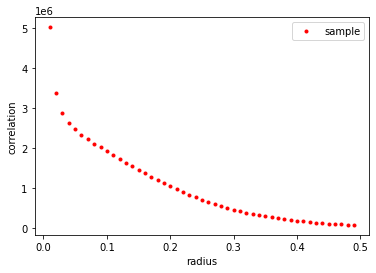

In [138]:
plt.plot(absi_log[1:] , corr_log[1:], '.', color = 'red', label='sample')
#plt.plot(absi_log,f_norm(absi_log,a,b) , color = 'Pink', label = 'polynome')
# Add title and axis names
plt.xlabel('radius')
plt.ylabel('correlation')
plt.legend()

plt.savefig("LogNorm-corr-mpl.pdf")

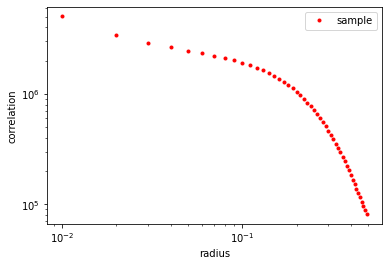

In [139]:
plt.loglog(absi_log , corr_log, '.', color = 'red', label='sample')
#plt.loglog(absi_log[1:],f_norm(absi_log[1:],a,b) , color = 'Pink', label = 'normal')

# Add title and axis names
plt.xlabel('radius')
plt.ylabel('correlation')
plt.legend()
plt.savefig("LogNorm-corr-log-mpl.pdf")

In [57]:
#fig_log = trace_pair_correlation(absi_log, corr_log, 'log-normal', 'ghostwhite', 'red', n)

In [58]:
#fig_log.show()

In [59]:
#a,b,c= sp.optimize.curve_fit(polynome_s, absi_log[2:], corr_log[2:], maxfev = 120000000 )[0]

In [60]:
def f(x):
    return(1/(a*(x**2)))

In [61]:
#x = np.linspace(0, 0.5, 30)
#fig_log.add_trace(go.Scatter(x = x[2:], y = polynome_inv(x[2:], a, b, c), marker_color = 'darkred', name="Polynome "))

In [62]:
#x = np.linspace(0, 0.5, 30)
#fig_log.add_trace(go.Scatter(x = x[1:], y = polynome_inv(x[1:], a, b, c), marker_color = 'firebrick'))

## Data

In [71]:
data = np.loadtxt("xz0.txt")
x = data[:,0]
y = data[:,1]
z = data[:,2]

In [72]:
data = np.stack((x, y, z), axis=-1)

2097152

In [74]:
d = 0
u = 0.01

In [91]:
tranche_1 = data[(data[:,0]>= d) & (data[:,0]<u)]
x = tranche_1[:,0]
y = tranche_1[:,1]
z = tranche_1[:,2]

In [92]:
len(tranche_1)

18441

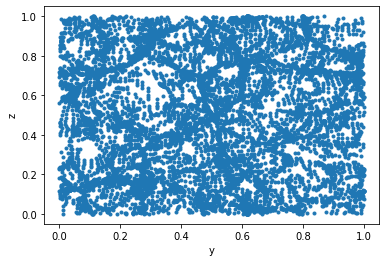

In [93]:
plt.plot(tranche_1[:,1],tranche_1[:,2], '.')
plt.xlabel('y')
plt.ylabel('z')
plt.savefig('slice_x_xz0.pdf')

In [94]:
tranche_1 = data[(data[:,1]>= d) & (data[:,1]<u)]
x = tranche_1[:,0]
y = tranche_1[:,1]
z = tranche_1[:,2]

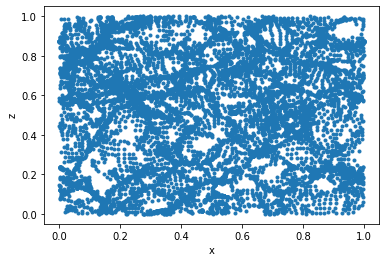

In [95]:
plt.plot(tranche_1[:,0],tranche_1[:,2], '.')
plt.xlabel('x')
plt.ylabel('z')
plt.savefig('slice_y_xz0.pdf')

In [96]:
tranche_1 = data[(data[:,2]>= d) & (data[:,2]<u)]
x = tranche_1[:,0]
y = tranche_1[:,1]
z = tranche_1[:,2]

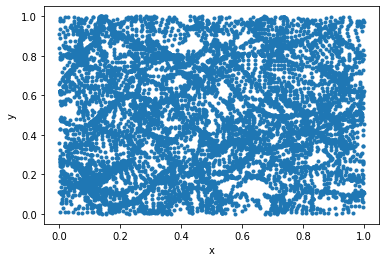

In [97]:
plt.plot(tranche_1[:,0],tranche_1[:,1], '.')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('slice_z_xz0.pdf')

fig = px.scatter(x = tranche_1[:,1],y = tranche_1[:,2],
                 labels={
                     "x" : "y",
                     "y" :  "z"
                 }, width=700, height=700,
                title="Dataset for  x coordinate between " + str(d) + " and " +str(u))

fig.update_layout(font=dict(size=18))
fig.show()

In [140]:
n_select = 200000
number_of_rows = data.shape[0]
#random_indices = np.random.choice(number_of_rows, size=n_select, replace=False)
#random_rows = data[random_indices, :]

In [141]:
number_of_rows/n_select

10.48576

In [142]:
#corr_data_0 = pair_correlation(data[0:n_select,:],r_max,dr)

for i in range(math.floor(number_of_rows/n_select)):
    correlation_data = pair_correlation(data[n_select*i,n_select*(i+1)], r_max,dr)
    file_name = 'corr_data_' + str(i)
    np.savetxt(file_name, [correlation_data[0] , correlation_data[1]])

correlation_data_1 = pair_correlation(data[n_select:2*n_select,:], r_max, dr)

np.savetxt('corr_xz0_200001_400000', [correlation_data_1[0] , correlation_data_1[1]])

In [143]:
#correlation_data_2 = pair_correlation(data[2*n_select:3*n_select,:], r_max, dr)

In [144]:
np.savetxt('corr_xz0_400001_600000', [correlation_data_2[0] , correlation_data_2[1]])

NameError: name 'correlation_data_2' is not defined

In [145]:
#correlation_data_3 = pair_correlation(data[3*n_select:4*n_select,:], r_max, dr)

In [ ]:
np.savetxt('corr_xz0_600001_800000', [correlation_data_3[0] , correlation_data_3[1]])

In [ ]:
#np.savetxt("xz0_200_000_rmax=0.5_dr=0.01.txt", [correlation_data[0] , correlation_data[1]])

In [146]:
abs_corr, corr = np.loadtxt("xz0_200_000_rmax=0.5_dr=0.01.txt")

In [147]:
a,b,c  = sp.optimize.curve_fit(polynome_inv, abs_corr[1:] , corr[1:])[0]

In [148]:
abs_corr

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49])

In [ ]:
plt.loglog(abs_corr, corr, '.', color = 'blue', label='sample')
abs_corr[0]=0.01
plt.loglog(abs_corr,polynome_inv(abs_corr,a,b,c) , color = 'lightBlue', label = 'polynome')
# Add title and axis names
plt.xlabel('radius')
plt.ylabel('correlation')
plt.legend()

plt.savefig("xz0-corr-randomselect_mpl-log.pdf")

Other Way to get correlation with expression 1 : 

In [90]:
#bins_2 = make_bins(data[200000:400000,:], r_max, dr) 

In [101]:
#bins_3 = make_bins(data[400000:600000,:], r_max, dr) 

In [105]:
np.savetxt("bins_data_400000_600000", [bins_3])

In [64]:
random_unif = np.random.uniform(0,1,(n_select,3))
bins_unif = make_bins(random_unif,r_max, dr)

In [66]:
np.savetxt("bins_unif_200000", [bins_unif])

In [63]:
get_bins = np.loadtxt("bins_data_0_200000")

In [70]:
get_bins_2 = np.loadtxt("bins_data_200000_400000")

In [59]:
bins_unif = np.loadtxt('bins_unif_200000')

In [ ]:
#With formula (1)
plt.loglog(abs_corr[1:], ((get_bins/bins_unif)-1)[1:], '.', color='brown', label= 'sample')
# Add title and axis names
plt.xlabel('radius')
plt.ylabel('correlation')
plt.legend()

plt.savefig("xz0-corr-2nd-methode.pdf")

In [ ]:
sum(bins)

In [ ]:
values = np.arange(dr,r_max+dr,dr)
values

In [ ]:
mean_seperation = sum(get_bins*values)/sum(get_bins)
mean_seperation 

In [ ]:
plt.loglog((abs_corr/mean_seperation)[1:] , ((get_bins_2/bins_unif)-1)[1:], '.', color = 'blue', label='sample')
abs_corr[0]=0.01
#plt.plot(abs_corr/mean_seperation ,polynome_inv((get_bins/bins_unif)-1,a,b,c) , color = 'lightBlue', label = 'polynome')
# Add title and axis names
plt.xlabel('radius')
plt.ylabel('correlation')
plt.legend()

plt.savefig("xz0-corr-mpl-200-400r-a.pdf")

In [ ]:
plt.loglog(abs_corr/mean_seperation , corr, '.', color = 'blue', label='sample')
abs_corr[0]=0.01
plt.loglog(abs_corr/mean_seperation ,polynome_inv(abs_corr,a,b,c) , color = 'lightBlue', label = 'polynome')
# Add title and axis names
plt.xlabel('radius')
plt.ylabel('correlation')
plt.legend()

plt.savefig("xz0-corr-mpl-r-a-log.pdf")

In [ ]:
fig_data = trace_pair_correlation(np.log(abs_corr[1:]/0.3719), np.log(corr[1:]), 'unknown','ghostwhite', 'blue', n_select)


In [ ]:
fig_data.update_xaxes(title_text='log(radius/mean interparticle seperation)')
fig_data.update_yaxes(title_text='log(pair correlation)')
fig_data.show()

## Bins not corr 

In [ ]:
#bins_norm = make_bins(data_norm, r_max, dr)

In [ ]:
# Bins
fig = px.scatter(x = np.arange(0, r_max, dr),y = bins_norm)
fig.update_layout(
    title="Bins for pair correlation function of a normal distribution before normalization",
    xaxis_title="radius",
    yaxis_title="correlation",
    legend_title="",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)
fig.show()

In [ ]:
#bins_log = make_bins(data_log, r_max, dr)

In [ ]:
# Bins 
fig = px.scatter(x = np.arange(0, r_max, dr),y = bins_log)
fig.update_layout(
    title="Bins for pair correlation function of a log-normal distribution before normalization",
    xaxis_title="radius",
    yaxis_title="correlation",
    legend_title="",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)
fig.show()

## Temporary 

In [ ]:
import time
k = 20
n = 1000
t0 = time.time()
evol_time = np.empty(k)
for i in range(k):
    data_unif = np.random.uniform(0,1,(n*i+1,3))
    correlation = pair_correlation(data_unif, 0.5, 0.01)
    t1 = time.time()
    evol_time[i] = t1-t0
    t0=t1
    
time.time()

In [ ]:
fig = px.scatter(x = np.arange(0,20000, 1000),y = evol_time)

In [ ]:
fig.show()

In [ ]:
%%time
tree = cKDTree(data_norm)
r_max = math.sqrt(2)/2
dr = 0.03
b = np.zeros(n)
bins_norm = np.empty(math.floor(r_max/dr)+1)
for i in range(math.floor(r_max/dr)+1):
    a = tree.query_ball_point(data_norm, i*dr+dr, return_length = True)
    bins_norm[i] = sum(a) - sum(b)
    b = a
sum(bins_norm)